# Q1
The file LaptopSalesJanuary2008.csv contains data for all sales of laptops at a computer chain in London in January 2008. This is a subset of the full dataset that includes data for the entire year.

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## a. Create a bar chat, showing the average retails price by store.

In [5]:
Laptop_df = pd.read_csv('./4/LaptopSalesJanuary2008.csv')
Laptop_df.head()

,Date,Configuration,Customer Postcode,Store Postcode,Retail Price,Screen Size (Inches),Battery Life (Hours),RAM (GB),Processor Speeds (GHz),Integrated Wireless?,HD Size (GB),Bundled Applications?,OS X Customer,OS Y Customer,OS X Store,OS Y Store,CustomerStoreDistance
0,1/1/2008 0:01,163,EC4V 5BH,SE1 2BN,455,15,5,1,2.0,Yes,80,Yes,532041,180995,534057.0,179682.0,2405.873022
1,1/1/2008 0:02,320,SW4 0JL,SW12 9HD,545,15,6,1,2.0,No,300,No,529240,175537,528739.0,173080.0,2507.558574
2,1/1/2008 0:04,23,EC3V 1LR,E2 0RY,515,15,4,1,2.0,Yes,300,Yes,533095,181047,535652.0,182961.0,3194.001409
3,1/1/2008 0:04,169,SW1P 3AU,SE1 2BN,395,15,5,1,2.0,No,40,Yes,529902,179641,534057.0,179682.0,4155.202281
4,1/1/2008 0:06,365,EC4V 4EG,SW1V 4QQ,585,15,6,2,2.0,No,120,Yes,531684,180948,528924.0,178440.0,3729.298057


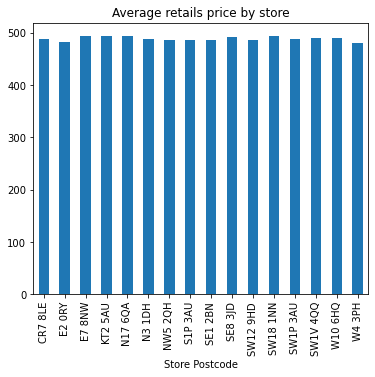

In [6]:
MeanPrice = Laptop_df.groupby("Store Postcode")['Retail Price'].mean().plot(kind='bar', title='Average retails price by store', figsize=(6, 5))

## b. To better compare retails prices across stores, create a side by side boxplots of the retail price by store. 

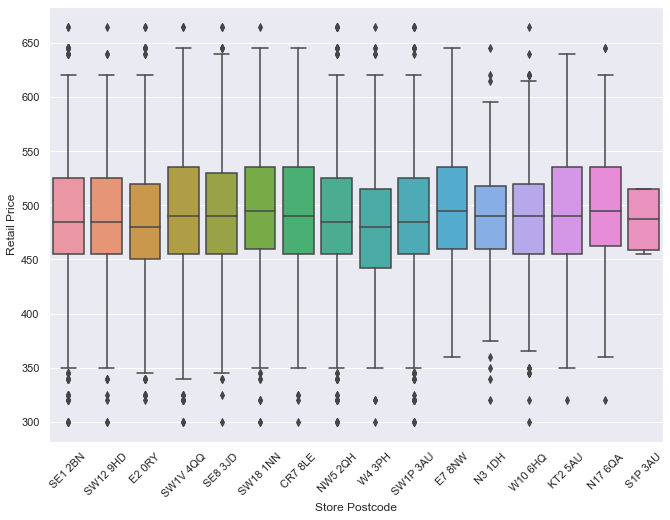

In [7]:
sns.set(rc={'figure.figsize':(11,8)})

plot = sns.boxplot(data=Laptop_df,
            x='Store Postcode', y='Retail Price')
plt.xticks(rotation=45)
plt.show()

# Q2
The dataset on American college and university rankings contains information on 1302 American colleges and universities offering an undergrad program. For each university, there are 17 measurements:

## a.	Remove all the categorical variables. Then remove all records with missing numerical measurements from the dataset.

In [8]:
uni_df = pd.read_csv('4/Universities.csv')

In [9]:
uni_df.dtypes

College Name                 object
State                        object
Public (1)/ Private (2)       int64
# appli. rec'd              float64
# appl. accepted            float64
# new stud. enrolled        float64
% new stud. from top 10%    float64
% new stud. from top 25%    float64
# FT undergrad              float64
# PT undergrad              float64
in-state tuition            float64
out-of-state tuition        float64
room                        float64
board                       float64
add. fees                   float64
estim. book costs           float64
estim. personal $           float64
% fac. w/PHD                float64
stud./fac. ratio            float64
Graduation rate             float64
dtype: object

In [10]:
cleaned_df = uni_df.select_dtypes(exclude=["object",'int64']).dropna()

## b.	Conduct PCA on the cleaned data and comments on the results should the data be normalized? Discuss what characterizes the components you consider key

In [11]:
from sklearn.decomposition import PCA

In [12]:
pcs = PCA()

In [13]:
pcs.fit(cleaned_df)

PCA()

In [16]:
pcsSummary = pd.DataFrame({'std_dev':np.sqrt(pcs.explained_variance_),
                           'prop_variance':pcs.explained_variance_ratio_,
                           'cum_prop_var':np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_tps = pcsSummary.transpose()
pcsSummary_tps.columns = ['PC{}'.format(i) for i in range(1,len(pcsSummary_tps.columns)+1)]

In [17]:
pcsSummary_tps

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
std_dev,7430.913993,5987.988977,1854.641218,1192.529271,967.427904,679.652692,596.976117,580.629902,417.613636,318.127186,188.867611,155.606172,19.049140,12.528743,11.018447,5.330031e+00,2.905918e+00
prop_variance,0.561370,0.364524,0.034969,0.014458,0.009515,0.004696,0.003623,0.003427,0.001773,0.001029,0.000363,0.000246,0.000004,0.000002,0.000001,2.888179e-07,8.584820e-08
cum_prop_var,0.561370,0.925894,0.960863,0.975321,0.984836,0.989532,0.993155,0.996582,0.998355,0.999384,0.999747,0.999993,0.999997,0.999998,1.000000,9.999999e-01,1.000000e+00


In [18]:
cleaned_df.head()

,# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
2,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
9,805.0,588.0,287.0,67.0,88.0,1376.0,207.0,11660.0,11660.0,2050.0,2430.0,120.0,400.0,900.0,74.0,14.0,72.0
11,608.0,520.0,127.0,26.0,47.0,538.0,126.0,8080.0,8080.0,1380.0,2540.0,100.0,500.0,1100.0,63.0,11.4,44.0
21,4414.0,1500.0,335.0,30.0,60.0,908.0,119.0,5666.0,5666.0,1424.0,1540.0,418.0,1000.0,1400.0,56.0,15.5,46.0


### The date should be normalized because som of the numbers are measured in absolute terms (e.g. no. of ppl) while others are meatured in percentage. The different measurements influence the scale of the numbers and their influence of the PCA result.

In [19]:
from sklearn import preprocessing

pcs = PCA()
pcs.fit((preprocessing.scale(cleaned_df)))

PCA()

In [20]:
pcsSummary_df = pd.DataFrame({'std_dev':np.sqrt(pcs.explained_variance_),
                               'prop_var':pcs.explained_variance_ratio_,
                               'cum_prop':np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns=['PC{}'.format(i) for i in range(1,len(pcsSummary_df.columns)+1)]
pcsSummary_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
std_dev,2.277291,2.144873,1.099549,1.033564,0.977025,0.873767,0.804127,0.773612,0.703910,0.662929,0.628545,0.550319,0.438773,0.304218,0.200236,0.174464,0.144029
prop_var,0.304414,0.270042,0.070967,0.062705,0.056032,0.044815,0.037956,0.035130,0.029085,0.025797,0.023190,0.017777,0.011301,0.005432,0.002353,0.001787,0.001218
cum_prop,0.304414,0.574456,0.645423,0.708128,0.764161,0.808975,0.846931,0.882061,0.911145,0.936942,0.960132,0.977909,0.989210,0.994642,0.996996,0.998782,1.000000


In [21]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary_df.columns,
                                index=cleaned_df.columns)
pcsComponents_df.iloc[:,:8]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
# appli. rec'd,0.078361,0.420164,-0.031982,0.072621,-0.016694,0.112320,-0.268145,-0.093570
# appl. accepted,0.023659,0.434471,-0.031423,0.118128,-0.089073,0.114381,-0.266285,-0.080991
# new stud. enrolled,-0.028802,0.445556,-0.038651,-0.031466,-0.075981,0.054079,-0.098870,-0.058138
% new stud. from top 10%,0.354028,0.093547,-0.120129,-0.372457,0.162260,-0.004445,0.102709,-0.112334
% new stud. from top 25%,0.340496,0.118396,-0.142720,-0.385565,0.158187,0.092636,0.136409,-0.039927
# FT undergrad,-0.049586,0.443583,-0.004012,-0.056459,-0.094781,0.043504,-0.043157,-0.043464
# PT undergrad,-0.106380,0.287700,0.265769,0.053495,-0.343681,-0.188041,0.509297,-0.122490
in-state tuition,0.379389,-0.150248,0.084350,0.041064,-0.172639,-0.000539,-0.129328,0.009974
out-of-state tuition,0.402555,-0.048728,0.051577,0.077658,-0.158499,-0.044407,-0.077965,-0.010688
room,0.273165,0.052271,0.250578,0.454416,-0.004482,-0.015068,-0.122402,-0.091329


### From the pcsSummary_df, we can see that PC1 and PC2 together can explain over 50% of the variance in the dataframe while all other PCs have values smaller than 8%. Then, we can see from the pcsComponents_df the detailed distribution of influences of each original column. To be considered as a key component, a variable should have dominant influence over an important PC. As such, this variable will have a greater influence overall. 